# 1. Importación de librerías. 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import HTML
from datetime import datetime
import re
import matplotlib.pyplot as plt
pd.options.display.max_rows = 25
import warnings
warnings.filterwarnings('ignore')

# 2. Importación del archivo y creación del data frame

In [2]:
sharks = pd.read_csv('attacks.csv', encoding = 'latin1')
display(sharks)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Exploración del data frame

3.1. Elementos totales del data frame (número de filas multiplicado por el número de columnas).

In [3]:
print(sharks.size)

617352


3.2. Número de filas y número de columnas.

In [4]:
print(sharks.shape)

(25723, 24)


3.3. Información general del data frame.

In [5]:
display(sharks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

None

3.4. Nombres de las columnas del data frame.

In [6]:
print(sharks.columns)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


3.5. Tipo de datos del data frame. 

In [7]:
display(sharks.dtypes)

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

# 4. Valores nulos por FILAS

4.1. Eliminación de las FILAS en las cuáles todos sus valores sean nulos.

In [8]:
filas_nulas = sharks.dropna(how = 'all', inplace=True)
print(filas_nulas)

None


4.2. Eliminación de FILAS cuyos valores nulos superen el 75% de los datos. 

In [9]:
def rows_removal (x):
    threshold = 0.75 * len(sharks.columns)
    return x.dropna(thresh = threshold)

sharks = rows_removal(sharks)

4.2. Comprobación de las medidas del data frame después de haber borrado las FILAS.

In [10]:
print(sharks.shape)

# 19.849 filas menos.

(5874, 24)


# 5. Valores nulos por COLUMNAS

5.1. Cuántos elementos nulos hay por cada COLUMNA.

In [11]:
nan_cols = sharks.isna().sum()
nan_cols[nan_cols > 0]
print(nan_cols)

Case Number                  1
Date                         0
Year                         2
Type                         1
Country                     10
Area                       240
Location                   314
Activity                   349
Name                        62
Sex                        337
Age                       2419
Injury                       8
Fatal (Y/N)                443
Time                      2942
Species                   2522
Investigator or Source      13
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5873
Unnamed: 23               5872
dtype: int64


5.2. Sustitución de los valores nulos en las COLUMNAS.

In [12]:
sharks = sharks.fillna('Unknown')

# 6. Comprobación de los datos del data frame

# 7. Reordenación de columnas según el objetivo

In [13]:
columns_order = ['Country', 'Year', 'Sex ', 'Age', 'Fatal (Y/N)', 'Date', 'Type', 'Activity', 'href formula', 'href', 'Case Number',
       'Case Number.1', 'Case Number.2', 'Area', 'Location', 'Name', 'Injury', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'original order', 'Unnamed: 22',
       'Unnamed: 23']
sharks = sharks.reindex(columns = columns_order) 

7.2. Cambio nombre columnas con espacio.

In [14]:
sharks = sharks.rename(columns = {'Sex ': 'Sex'})

sharks = sharks.rename(columns = {'Species ': 'Species'})

# 8. Limpieza de los datos por COLUMNA

# 8.1. Limpieza columna 'Country'.

In [15]:
# Para que contenga los valores que se correspondan con los la lista.

world_countries = ['Afghanistan', 'Albania', 'Germany', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Saudi Arabia', 'Algeria', 'Argentina', 'Armenia',
    'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin',
    'Belarus', 'Myanmar', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
    'Bhutan', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada', 'Qatar', 'Chad', 'Chile', 'China', 'Cyprus',
    'Colombia', 'Comoros', 'Congo', 'North Korea', 'South Korea', 'Ivory Coast', 'Costa Rica', 'Croatia', 'Cuba', 'Denmark',
    'Dominica', 'Ecuador', 'Egypt', 'El Salvador', 'United Arab Emirates', 'Eritrea', 'Slovakia', 'Slovenia', 'Spain', 'United States',
    'Estonia', 'Ethiopia', 'Fiji', 'Philippines', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada',
    'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq',
    'Iran', 'Ireland', 'Iceland', 'Marshall Islands', 'Solomon Islands', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
    'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Kiribati', 'Kuwait', 'Laos', 'Lesotho', 'Latvia', 'Lebanon', 'Liberia',
    'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'North Macedonia', 'Madagascar', 'Malaysia', 'Malawi', 'Maldives', 'Mali',
    'Malta', 'Morocco', 'Mauritius', 'Mauritania', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro',
    'Mozambique', 'Namibia', 'Nauru', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'New Zealand', 'Oman',
    'Netherlands', 'Pakistan', 'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Poland', 'Portugal',
    'United Kingdom', 'Central African Republic', 'Czech Republic', 'Congo', 'Dominican Republic', 'Rwanda', 'Romania', 'Russia', 'Samoa',
    'Saint Kitts and Nevis', 'San Marino', 'Saint Lucia', 'São Tomé and Príncipe', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
    'Syria', 'Somalia', 'Sri Lanka', 'South Africa', 'Sudan', 'South Sudan', 'Sweden', 'Switzerland', 'Suriname', 'Eswatini',
    'Thailand', 'Taiwan', 'Tanzania', 'Tajikistan', 'East Timor', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkmenistan',
    'Turkey', 'Tuvalu', 'Ukraine', 'Uganda', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Yemen',
    'Djibouti', 'Zambia', 'Zimbabwe', 'usa', 'england', 'scotland', 'colombia', 'nicaragua', 'sudan', 'egypt', 'peru', 'ghana', 'korea']


# Conversión a minúsculas.

world_countries = [e.lower() for e in world_countries]


#Verificar qué países hay. 

def correct_country (x):
    x = x.lower()
    if x in world_countries:
        return x
    else:
        return 'Unknown'
    return x

sharks['Country'] = sharks['Country'].apply(correct_country)


# Conversión a mayúsculas de las primeras letras.

def correct_mayusc (x): 
    if x != 'usa':
        return x.title()
    else:
        return 'USA'
    
sharks['Country'] = sharks['Country'].apply(correct_mayusc)


# Creación columna con filtro por países de habla inglesa o no.

english_sp_places = ['USA', 'England', 'Scotland', 'Ireland', 'Australia', 'Canada', 'New Zealand']
sharks['English Speaking'] = sharks['Country'].apply(lambda x: 'Yes' if x in english_sp_places else 'No')


# Eliminación por FILAS de países que NO sean de habla inglesa.

sharks = sharks[sharks['English Speaking'] != 'No']


# Comprobación. 

print(sharks['Country'].unique())

['USA' 'Australia' 'England' 'New Zealand' 'Scotland' 'Canada' 'Ireland']


# 8.2. Limpieza columna 'Year'.

In [16]:
# Sustitución de 'Unknown' por valores de columna con datos del año.

values = sharks[sharks['Year'] == 'Unknown']['Case Number'].str.split('.').values

values = [e[0] for e in values]

indexes = sharks[sharks['Year'] == 'Unknown'].index

sharks.loc[indexes, 'Year'] = values


# Conversión de los años de 'float' a 'integer'.

sharks['Year'] = sharks['Year'].astype(int)


# Eliminación por FILAS de ataques que NO fueran en los siglos XX y XXI.

sharks = sharks[(sharks['Year'] >= 1901) & (sharks['Year'] <= 2018)]


# Comprobación. 

print(sharks['Year'].unique())

[2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005
 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994 1993 1992 1991
 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981 1980 1979 1978 1977
 1976 1975 1974 1973 1972 1971 1970 1969 1968 1967 1966 1965 1964 1963
 1962 1961 1960 1959 1958 1957 1956 1955 1954 1953 1952 1951 1950 1949
 1948 1947 1946 1945 1944 1943 1942 1941 1940 1939 1938 1937 1936 1935
 1934 1933 1932 1931 1930 1929 1928 1927 1926 1925 1924 1923 1922 1921
 1920 1919 1918 1917 1916 1915 1914 1913 1912 1911 1910 1909 1908 1907
 1906 1905 1904 1903 1902 1901]


# 8.3. Limpieza columna 'Sex'.

In [17]:
# Para que contenga valores 'M', 'N', 'lli', 'N' y 'Unknown'.

sharks['Sex'] = sharks['Sex'].apply(lambda x: 'M' if x == 'M ' else 'Unknown' if x == '.' else x)


# Eliminación por filas de ataques que NO fueran a hombres.

sharks = sharks[sharks['Sex'] == 'M']


# Comprobación.

print(sharks['Sex'].unique())

['M']


# 8.4. Limpieza columna 'Age'.

In [19]:
# Conversión de la serie de 'str' a 'float'.

sharks['Age'] = pd.to_numeric(sharks['Age'], errors = 'coerce')


# Conversión de datos de 'str' a 'Unknown'.

sharks['Age'] = sharks['Age'].fillna('Unknown')


#Comprobación. 

print(sharks['Age'].unique())

[48.0 'Unknown' 52.0 15.0 12.0 32.0 10.0 21.0 60.0 29.0 41.0 37.0 25.0
 69.0 18.0 34.0 35.0 14.0 28.0 7.0 31.0 17.0 54.0 33.0 13.0 40.0 50.0 46.0
 19.0 73.0 16.0 39.0 58.0 30.0 26.0 22.0 55.0 57.0 47.0 20.0 61.0 65.0
 42.0 36.0 43.0 9.0 49.0 59.0 11.0 27.0 64.0 71.0 44.0 62.0 38.0 68.0 6.0
 63.0 70.0 53.0 23.0 8.0 24.0 45.0 3.0 51.0 56.0 5.0 86.0 66.0 84.0 75.0
 87.0 67.0 74.0 78.0]


# 8.5. Limpieza columna 'Fatal (Y/N)'.

In [20]:
# Para que contenga valores 'Y', 'N' y 'Unknown'.

def correct_fatal (x):
    if x == 'M' or x == ' N':
        return 'N'
    elif x == 'y':
        return 'Y'
    elif x == '2017' or x == 'UNKNOWN':
        return 'Unknown'
    return x

sharks['Fatal (Y/N)'] = sharks['Fatal (Y/N)'].apply(correct_fatal)


# Comprobación. 

print(sharks['Fatal (Y/N)'].unique())

['N' 'Unknown' 'Y']


# 8.6. Limpieza columna 'Date'.

In [21]:
# Extracción de año.mes.día de la columna 'pdf'.

sharks['Date'] = sharks['pdf'].str[:10]

# 8.7. Limpieza columna 'Type'.

In [22]:
# Para que tenga valores 'Invalid', '(Un)provoked', 'Questionable', 'Sea Disaster' y 'Boating'

sharks['Type'] = sharks['Type'].apply(lambda x: 'Boating' if x == 'Boat' or x == 'Boatomg' else x)


# Comprobación.

display(sharks['Type'].value_counts())

Unprovoked      2074
Provoked         302
Invalid          214
Boating           71
Sea Disaster      39
Questionable       2
Name: Type, dtype: int64

# 8.8. Limpieza columna 'Activity'.

In [23]:
# Almacenamiento de valores únicos en una variable. 

frequency = sharks['Activity'].value_counts()

# Alamacenamiento de valores que se repiten menos de 4 veces en una variable. 

data_change = frequency[frequency < 4].index

# Cambio de los datos en el data frame y sustitución del resto por 'Unknown'.

sharks['Activity'] = sharks['Activity'].apply(lambda x: 'Unknown' if x in data_change else x)

# Corrección de espacios

def correct_spaces (x):
    if x == 'Surfing ':
        return 'Surfing'
    elif x == 'Fishing ':
        return 'Fishing'
    elif x == 'Surf skiing':
        return 'Surf-skiing'
    else:
        return x

sharks['Activity'] = sharks['Activity'].apply(correct_spaces)


# Comprobación.

sharks['Activity'].unique()

array(['Surfing', 'Unknown', 'Fishing', 'Walking', 'Standing',
       'Boogie boarding', 'Swimming', 'Body boarding',
       'Stand-Up Paddleboarding', 'Wading', 'Spearfishing', 'Diving',
       'Free diving', 'Snorkeling', 'Kayaking', 'Canoeing',
       'Kayaking / Fishing', 'Surf fishing', 'Fishing for sharks',
       'Floating', 'Body surfing', 'Windsurfing', 'Paddle boarding',
       'Kayak Fishing', 'Surf-skiing', 'Treading water', 'Surf skiing ',
       'Kite Surfing', 'Swimming ', 'Boogie Boarding', 'Scuba diving',
       'Diving for abalone', 'Sitting on surfboard',
       'Surfing (sitting on his board)', 'Free diving for abalone',
       'Floating on his back', 'Paddling on surfboard', 'Freediving',
       'Spearfishing on Scuba', 'Bathing', 'Diving for trochus',
       'Pearl diving'], dtype=object)

# 8.9. Limpieza columna 'Case Number'.

In [24]:
# Extracción de año.mes.día de la columna 'pdf'.

sharks['Case Number'] = sharks['pdf'].str[:10]


# Comprobación.

print(sharks['Case Number'].unique())

['2018.06.09' '2018.06.08' '2018.06.03' ... '1901.12.01' '1901.01.30'
 '1901.00.00']


# 8.10. Limpieza columna 'Case Number.1'.

In [25]:
# Extracción de año.mes.día de la columna 'pdf'.

sharks['Case Number.1'] = sharks['pdf'].str[:10]


# Comprobación.

print(sharks['Case Number.1'].unique())

['2018.06.09' '2018.06.08' '2018.06.03' ... '1901.12.01' '1901.01.30'
 '1901.00.00']


# 8.11. Limpieza columna 'Case Number.2'.

In [26]:
# Extracción de año.mes.día de la columna 'pdf'.

sharks['Case Number.2'] = sharks['pdf'].str[:10]


# Comprobación.

print(sharks['Case Number.2'].unique())

['2018.06.09' '2018.06.08' '2018.06.03' ... '1901.12.01' '1901.01.30'
 '1901.00.00']


# 8.12. Limpieza columna 'href formula' and 'href'.

In [27]:
# Despliege de los enlaces para que sean accesibles.

#HTML(sharks.to_html(escape = False))

# 9. Datos finales del data frame.

In [28]:
print(sharks.shape)

print(sharks.size)

(2702, 25)
67550


In [29]:
display(sharks)

,Country,Year,Sex,Age,Fatal (Y/N),Date,Type,Activity,href formula,href,...,Name,Injury,Time,Species,Investigator or Source,pdf,original order,Unnamed: 22,Unnamed: 23,English Speaking
2,USA,2018,M,48.0,N,2018.06.09,Invalid,Surfing,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,...,John Denges,Injury to left lower leg from surfboard skeg,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,6301.0,Unknown,Unknown,Yes
3,Australia,2018,M,Unknown,N,2018.06.08,Unprovoked,Surfing,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,...,male,Minor injury to lower leg,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,6300.0,Unknown,Unknown,Yes
5,Australia,2018,M,Unknown,N,2018.06.03,Unprovoked,Unknown,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,...,Chris,"No injury, board bitten",Unknown,Unknown,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,6298.0,Unknown,Unknown,Yes
7,USA,2018,M,52.0,N,2018.05.27,Unprovoked,Fishing,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,...,male,Minor injury to foot. PROVOKED INCIDENT,Unknown,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,6296.0,Unknown,Unknown,Yes
8,USA,2018,M,15.0,N,2018.05.26,Unprovoked,Walking,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,...,Cody High,Lower left leg bitten,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,6295.0,Unknown,Unknown,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5539,Australia,1902,M,Unknown,Y,1902.01.22,Unprovoked,Unknown,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,...,John Ogier,FATAL,Unknown,Unknown,"The Advertiser, 1/25/1902",1902.01.22-Ogier.pdf,764.0,Unknown,Unknown,Yes
5541,Australia,1902,M,16.0,N,1902.01.19,Unprovoked,Swimming,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,...,Charles Jones,Legs bitten,12h00,Unknown,"Brisbane Courier, 1/20/1902",1902.01.19-Jones.pdf,762.0,Unknown,Unknown,Yes
5542,Australia,1901,M,10.0,N,1901.12.01,Unprovoked,Bathing,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,...,William Quince,Lacerations to torso & thigh,Unknown,Unknown,"The Argus, 12/2/1901",1901.12.01-Quince.pdf,761.0,Unknown,Unknown,Yes
5549,Australia,1901,M,Unknown,Y,1901.01.30,Unprovoked,Bathing,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,...,John Thompson,"Thigh bitten, FATAL",Unknown,Unknown,"Otago Witness, 2/6/1901",1901.01.30-Thompson.pdf,754.0,Unknown,Unknown,Yes


# 10. Gráfica con los resultados. 

USA            1647
Australia       964
New Zealand      70
England          12
Scotland          4
Canada            4
Ireland           1
Name: Country, dtype: int64


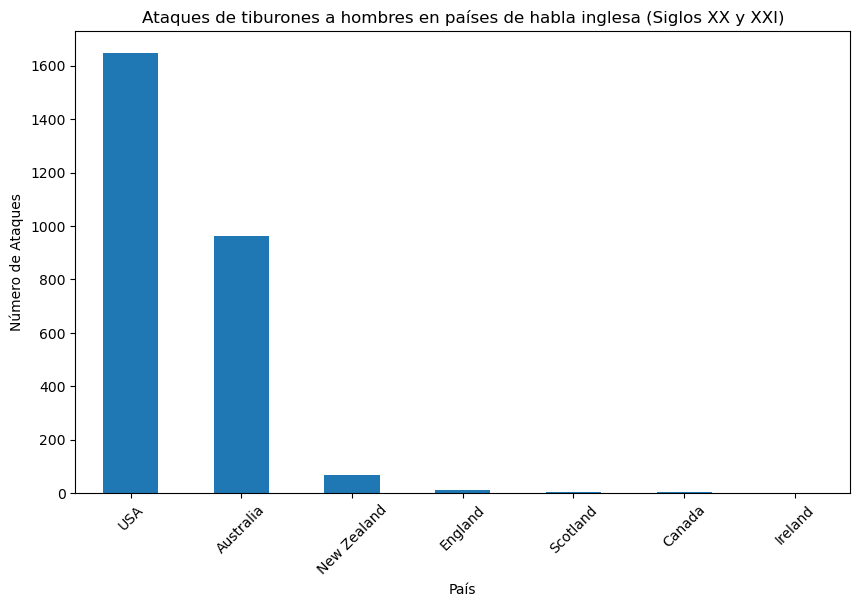

In [30]:
# Filtrado por países de habla inglesa. 

english_speaking_places = ['USA', 'Australia', 'England', 'New Zealand', 'Scotland', 'Canada', 'Ireland']
sharks_english = sharks[sharks['Country'].isin(english_speaking_places)]


# Filtrado por ataques en los siglos XX y XXI.

sharks_XX_XXI = sharks_english[sharks_english['Year'].between(1901, 2018, inclusive = True)]


# Filtrado por ataques a hombres. 

sharks_male = sharks_XX_XXI[sharks_XX_XXI['Sex'] == 'M']


# Cantidad de ataques por país.

attack_count = sharks_male['Country'].value_counts()
print(attack_count)


# Creación de la gráfica. 

plt.figure(figsize = (10, 6))
attack_count.plot(kind = 'bar')
plt.title('Ataques de tiburones a hombres en países de habla inglesa (Siglos XX y XXI)')
plt.xlabel('País')
plt.ylabel('Número de Ataques')
plt.xticks(rotation = 45)    
plt.show()